In [11]:
# This cell is used for creating a button that hides/unhides code cells to quickly look only the results.
# Works only with Jupyter Notebooks.

import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [12]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    # JupyterHub
    course_data_dir = '/coursedata'
elif os.path.isdir('../../../coursedata'):
    # Local installation
    course_data_dir = '../../../coursedata'
else:
    # Docker
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

The data directory is /home/jovyan/work/coursedata/
Data stored in /home/jovyan/work/coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7
The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms, which are listed in the table above. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2.  (idf is the logarithm term on slide 69 of Lecture 6 where values $n_i/N$ are given in the table above.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

a) Inverse Document Frequency (idf) for Terms:
cat: 4.32
dog: 2.32
mammals: 5.64
mouse: 3.32
pet: 0.74
b) Term Frequencies:
Query: [1, 0, 1, 1, 1]
D1: [1, 1, 0, 1, 3]
D2: [1, 1, 1, 1, 0]
D3: [2, 1, 0, 1, 0]
c) Tf-idf weighted word occurrence histograms:


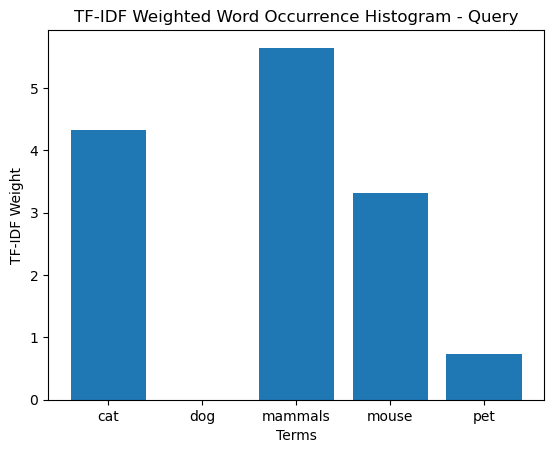

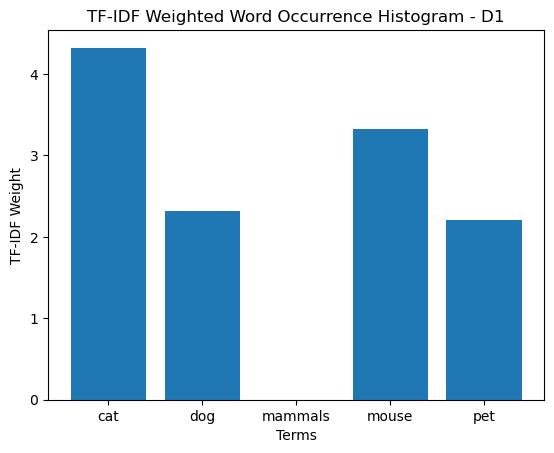

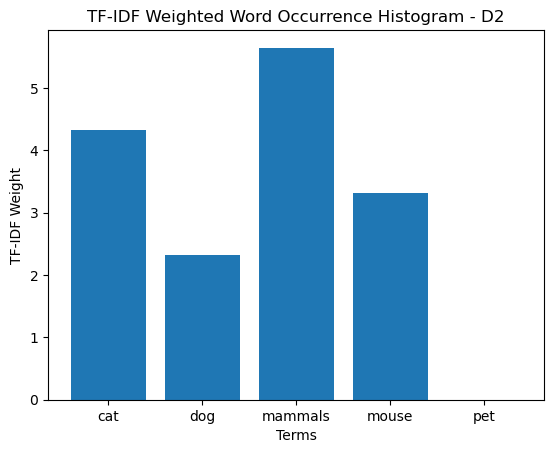

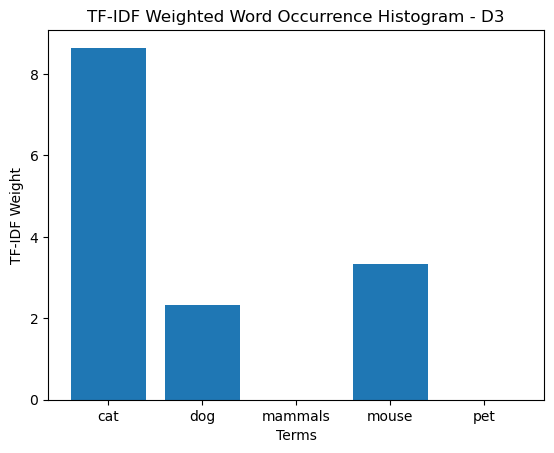

d) Cosine Similarity Scores:
D1: 0.63
D2: 0.95
D3: 0.64

 e) Relative Ranking of Documents:
Rank 1: Document 2
Rank 2: Document 3
Rank 3: Document 1


In [10]:
## Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##
import numpy as np
import os
import matplotlib.pyplot as plt

# Given data
terms = ["cat", "dog", "mammals", "mouse", "pet"]
percent_documents = [5, 20, 2, 10, 60]

# Documents and query
D1 = "Cat is a pet, dog is a pet, and mouse may be a pet too."
D2 = "Cat, dog and mouse are all mammals."
D3 = "Cat and dog get along well, but cat may eat a mouse."
query = ["mouse", "cat", "pet", "mammals"]

# Number of documents
N = 100 

# a) Compute inverse document frequency (idf)
idf = [np.log2(N / p) for p in percent_documents]

print("a) Inverse Document Frequency (idf) for Terms:")
for term, idf_value in zip(terms, idf):
    print(f"{term}: {idf_value:.2f}")

# b) Compute term frequencies for the query and documents
def term_frequency(document, terms):
    terms_count = [document.lower().count(term) for term in terms]
    return terms_count

tf_query = term_frequency(" ".join(query), terms)
tf_D1 = term_frequency(D1, terms)
tf_D2 = term_frequency(D2, terms)
tf_D3 = term_frequency(D3, terms)

print("b) Term Frequencies:")
print("Query:", tf_query)
print("D1:", tf_D1)
print("D2:", tf_D2)
print("D3:", tf_D3)

# c) Compute tf-idf weighted word occurrence histograms
def tfidf(tf, idf):
    return [tf[i] * idf[i] for i in range(len(terms))]

tfidf_query = tfidf(tf_query, idf)
tfidf_D1 = tfidf(tf_D1, idf)
tfidf_D2 = tfidf(tf_D2, idf)
tfidf_D3 = tfidf(tf_D3, idf)


# Helper function to create histograms
def create_histogram(data, label):
    plt.bar(range(len(terms)), data, tick_label=terms)
    plt.title(f"TF-IDF Weighted Word Occurrence Histogram - {label}")
    plt.xlabel("Terms")
    plt.ylabel("TF-IDF Weight")
    plt.show()

# Create histograms
print("c) Tf-idf weighted word occurrence histograms:")
create_histogram(tfidf_query, "Query")
create_histogram(tfidf_D1, "D1")
create_histogram(tfidf_D2, "D2")
create_histogram(tfidf_D3, "D3")

# d) Evaluate cosine similarity
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

similarity_D1 = cosine_similarity(tfidf_query, tfidf_D1)
similarity_D2 = cosine_similarity(tfidf_query, tfidf_D2)
similarity_D3 = cosine_similarity(tfidf_query, tfidf_D3)

print("d) Cosine Similarity Scores:")
print(f"D1: {similarity_D1:.2f}")
print(f"D2: {similarity_D2:.2f}")
print(f"D3: {similarity_D3:.2f}")


# e) Report the relative ranking of the documents
similarity_scores = [similarity_D1, similarity_D2, similarity_D3]
ranking = np.argsort(similarity_scores)[::-1]


print("\n e) Relative Ranking of Documents:")
for i, rank in enumerate(ranking):
    print(f"Rank {i + 1}: Document {rank + 1}")

##--your-code-ends-here--##

## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particular case.<br> 
(Hint: Precision and recall are explained on slide 67 of Lecture 6 and there is a good explanation also in Wikipedia.)

Type your answer here:

Precision = #relevant / #returned = 300/350 = 0.857

Recall = #relevant / #total	relevant = 300/500 = 0.6

## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)
Stage I.B (two questions)
Stage I.C (one question)

Part2 (one question)

Part3:
Stage III.A (three questions)
Stage III.B (one question)
Stage III.C (two questions)

Answering questions in part 1 corresponds to one bonus point and parts 2 and 3 together correspond to one additional point. Hence, in total this third task is worth of 2 points, whereas the previous tasks (Exercise 1 and Exercise 2) are both worth of 1 point so that in total this homework round is worth of 4 points.

Type your answers here: 

## Part I: Sparse features for matching object instances
### Stage I.A: SIFT features detector

<b>Question</b>: Note the change in density of detections across the image. Why does it change? Will it be a problem for matching? How could it be avoided?

The change in the density of feature detections across the image can be attributed to variations in lighting and contrast. When the lighting conditions change, it can affect how well the feature detection algorithm identifies key points in the image. In areas with low contrast or poor lighting, the algorithm may struggle to detect distinctive features.

This can indeed be problematic for matching because if there are too few detected features in a certain region, it may be challenging to establish correspondences between images or to accurately align them. To avoid this issue we can adapt the peakThreshold to adjust the sensitivity of the feature detection algorithm. In this way, using a smaller threshold value we will be able to select features that correspond to lower contrast structures in the image. 


<b>Question</b>: Occasionally, a feature is detected multiple times, with different orientations. This may happen when the orientation assignment is ambiguous. Which kind of image structure would result in ambiguous orientation assignment?

Symmetrical objects, such as symmetric shapes, objects with bilateral symmetry or features with radial symmetry (such as circular objects or concentric patterns) can have ambiguous orientation assignments. Since they look the same from multiple angles, the detector may assign different orientations to the same feature.



### Stage I.B: SIFT features detectors and matching between images

<b>Question</b>: Note the descriptors are computed over a much larger region (shown in blue) than the detection (shown in green). Why?

SIFT descriptors are computed over a larger region than the keypoint detection frames to account for the possibility that matched keypoints in different images may not be in the exact same position. This larger descriptor region allows for more robust matching in cases where keypoints are slightly displaced or transformed, providing tolerance to geometric and photometric variations between images.


<b>Question</b>: Notice that there are many mismatches. Examine some of the mismatches to understand why the mistakes are being made. For example, is the change in lighting a problem? What additional constraints can be applied to remove the mismatches?

The change in lighting, including variations in contrast, brightness, and shadows, can indeed be a significant problem in feature matching, leading to mismatches. To adress this issue, we can try applying photometric normalization methods to standardize lighting conditions across images, reducing the impact of contrast and brightness changes. 



### Stage I.C: Improving SIFT matching using Lowe’s second nearest neighbour test

<b>Question</b>: Examine some of the remaining mismatches to understand why they have occurred. How could they be removed?

The remaining mismatches occurring in dark lines, edges, and corners, probably due to symmetry, can be challenging to handle. To reduce these mismatches, we could develop techniques that explicitly handle symmetry in matching, such as methods to distinguish between left and right sides in symmetric objects. Additionally, using edge-aware descriptors improves differentiation in regions with strong edges and corners, collectively improving the robustness of matching in complex scenes.



## Part II: Affine co-variant detectors

<b>Question</b>: The transformation between the images induced by the plane is a planar homography. The detections are only affine co-variant (not as general as a planar homography). So how can descriptors computed on these detections possibly match?

The matching process relies on comparing adapted descriptors in the context of local geometric properties. As long as the transformation remains close to affine in the regions around keypoints, the adapted descriptors can still match.



## Part III: Towards large scale retrieval

### Stage III.A: Accelerating descriptor matching with visual words

<b>Questions</b>: The size of the vocabulary (the number of clusters) is an important parameter in visual word algorithms. How does the size affect the number of inliers and the difficulty of computing the transformation?

A larger vocabulary can result in a higher number of inliers because it allows for more fine-grained matching. When the vocabulary is small, multiple different descriptors may be quantized to the same visual word, leading to potential mismatches. With a larger vocabulary, you have a better chance of accurately matching descriptors based on their visual words. 

However, it can also increase the computational complexity. This is because searching for the nearest visual words in a larger vocabulary takes more time. 


<b>Questions</b>: In the above procedure the time required to convert the descriptors into visual words was not accounted for. Why?

The time required to convert descriptors into visual words is not explicitly accounted because it is typically a one-time preprocessing step. Once the vocabulary is created and descriptors are quantized, this step can be considered fixed, and the primary focus is on the time required for matching and geometric verification.


<b>Questions</b>: What is the speedup in searching a large, fixed database of 10, 100, 1000 images? 

Using visual words for retrieval can significantly speed up the process compared to matching raw descriptors directly. The visual words act as a compact representation that allows for efficient indexing and retrieval. The larger the database, the more pronounced the speedup becomes, as it reduces the need to compare descriptors against all database images. 


### Step III.b: Searching with an inverted index

<b>Question</b>: Why does the top image have a score of 1 (0.9698... see the NOTE above)?

Because it is the same image that the one that we are comparing it to.



### Stage III.C: Geometric rescoring

<b>Question</b>: Why is the top score much larger than 1 now?<br>

Because we are now rescoring them based on the number of inlier matches, so the maximum score can be 1024.


<b>Question</b>: Are the retrieval results improved after geometric verification?

Yes, the images that are more similar to the original one have a greater score (in relation to the total score) than previously.
